<h2>Comparing MLP, Random Forest and Logistic Regression</h2>

In [2]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1, cache=True, parser ='auto' )

# Prepare data
X = mnist.data.astype('float32')
y = mnist.target.astype('int')

# Subset of training dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [3]:
# Train MLP
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=10, random_state=42)
mlp.fit(X_train, y_train)

c:\Users\dhruv\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=10, random_state=42)

In [4]:
# Train Logistic Regression
lr = LogisticRegression(max_iter=100, random_state=42)
lr.fit(X_train, y_train)

c:\Users\dhruv\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

Model: MLP
F1-score: 0.9715917529638729


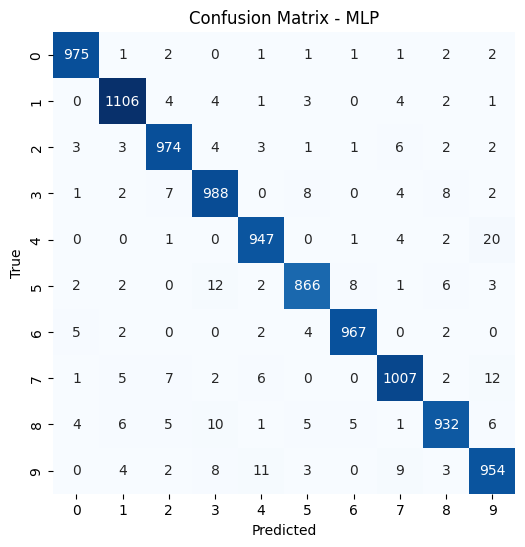

Model: Random Forest
F1-score: 0.9686810271583829


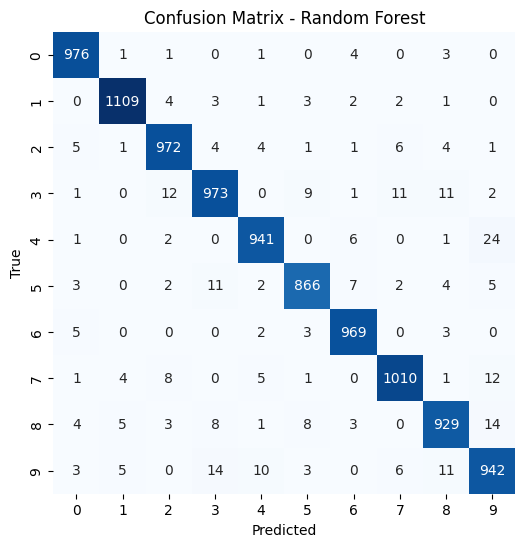

Model: Logistic Regression
F1-score: 0.9217920708506417


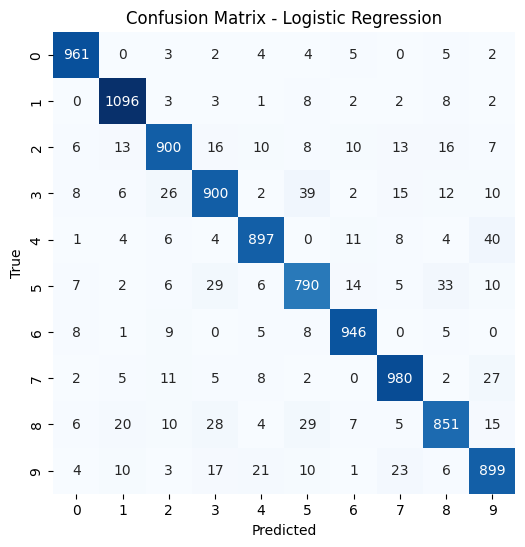

In [5]:
# Evaluate models
models = {'MLP': mlp, 'Random Forest': rf, 'Logistic Regression': lr}
for name, model in models.items():
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    print(f"Model: {name}")
    print(f"F1-score: {f1}")
    

    # Plot confusion matrix as heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, square=True)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()



In [33]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1, cache=True, parser='auto')

# Prepare data
X = mnist.data.astype('float32')
y = mnist.target.astype('int')

# Subset of training dataset
X_train, _, y_train, _ = train_test_split(X, y, test_size=10000, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Train MLP
mlp = MLPClassifier(hidden_layer_sizes=(30, 20, 10), max_iter=10, random_state=42)
mlp.fit(X_train_scaled, y_train)



c:\Users\dhruv\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(30, 20, 10), max_iter=10, random_state=42)

In [30]:
print(X_train_scaled.shape)
print(y_train.shape)

(60000, 784)
(60000,)


In [35]:
mlp_untrained = MLPClassifier(hidden_layer_sizes=(30, 20, 10), max_iter=10, random_state=42)
mlp_untrained.fit([[0]*784], [0])

c:\Users\dhruv\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(30, 20, 10), max_iter=10, random_state=42)

<center><h1>t-SNE plot to visualize the output from the layer containing 20 neurons</h1></center>

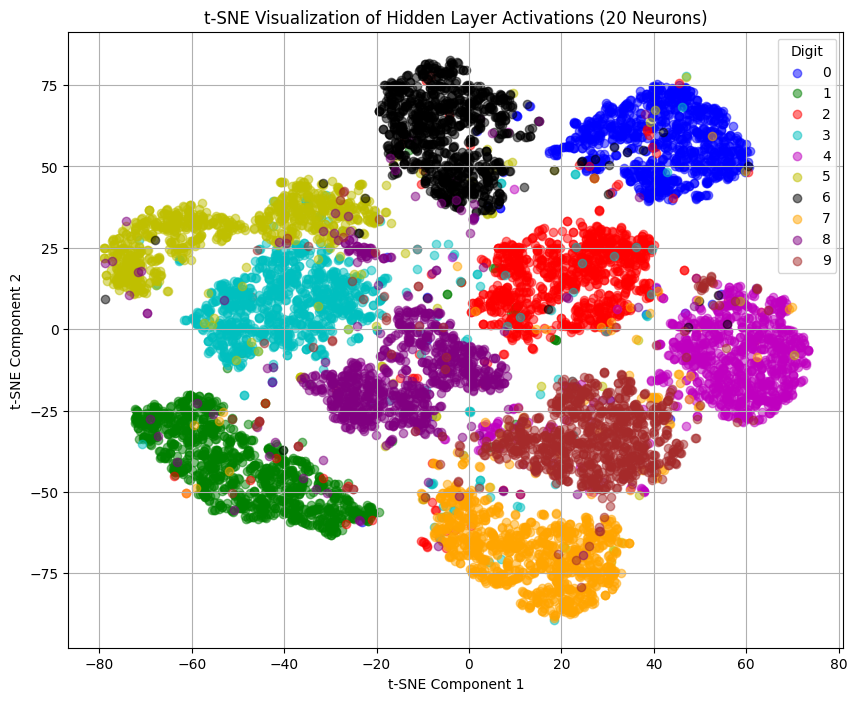

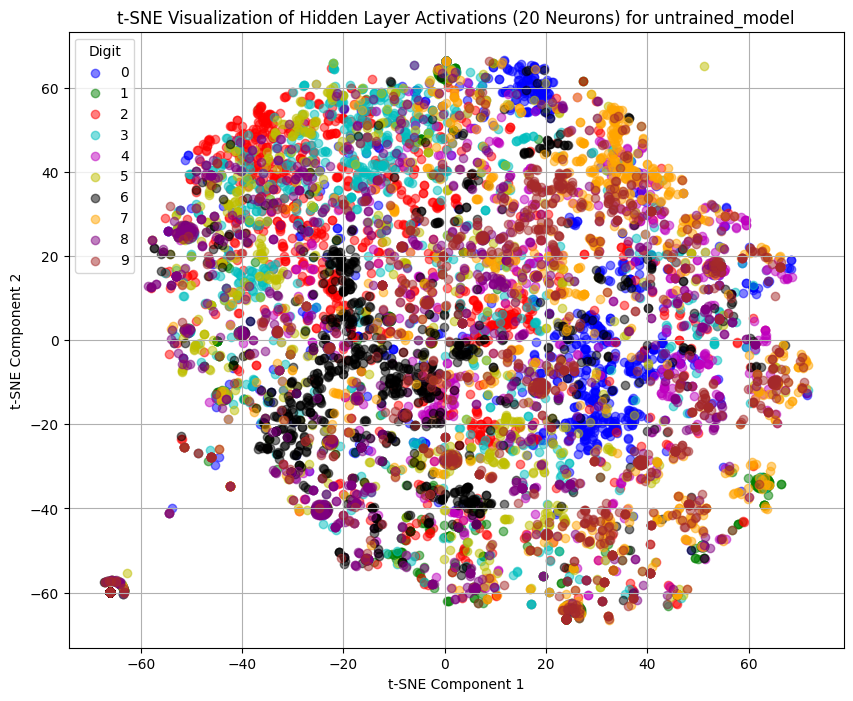

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Assuming you have already trained your MLP model
# Extract activations from the layer containing 20 neurons
activation_layer = mlp.hidden_layer_sizes[-2]  # Index of the layer containing 20 neurons
al_untrained = mlp_untrained.hidden_layer_sizes[-2]
activation_fn = np.vectorize(lambda x: max(0, x))  # ReLU activation function
hidden_activations = activation_fn(np.dot(X_test, mlp.coefs_[0]) + mlp.intercepts_[0])  # First hidden layer activations
ha_untrained = activation_fn(np.dot(X_test, mlp_untrained.coefs_[0]) + mlp_untrained.intercepts_[0])

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
tsne_result_untrained = tsne.fit_transform(ha_untrained)
tsne_result = tsne.fit_transform(hidden_activations)

# Plot t-SNE results
plt.figure(figsize=(10, 8))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown']
for i in range(10):
    plt.scatter(tsne_result[y_test == i, 0], tsne_result[y_test == i, 1], c=colors[i], label=str(i), alpha=0.5)
plt.title('t-SNE Visualization of Hidden Layer Activations (20 Neurons)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Digit')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 8))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown']
for i in range(10):
    plt.scatter(tsne_result_untrained[y_test == i, 0], tsne_result_untrained[y_test == i, 1], c=colors[i], label=str(i), alpha=0.5)
plt.title('t-SNE Visualization of Hidden Layer Activations (20 Neurons) for untrained_model')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Digit')
plt.grid(True)
plt.show()


<h1><center>Confusion Matrix and F1-score for the Fashion-MNIST dataset</h1>

c:\Users\dhruv\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


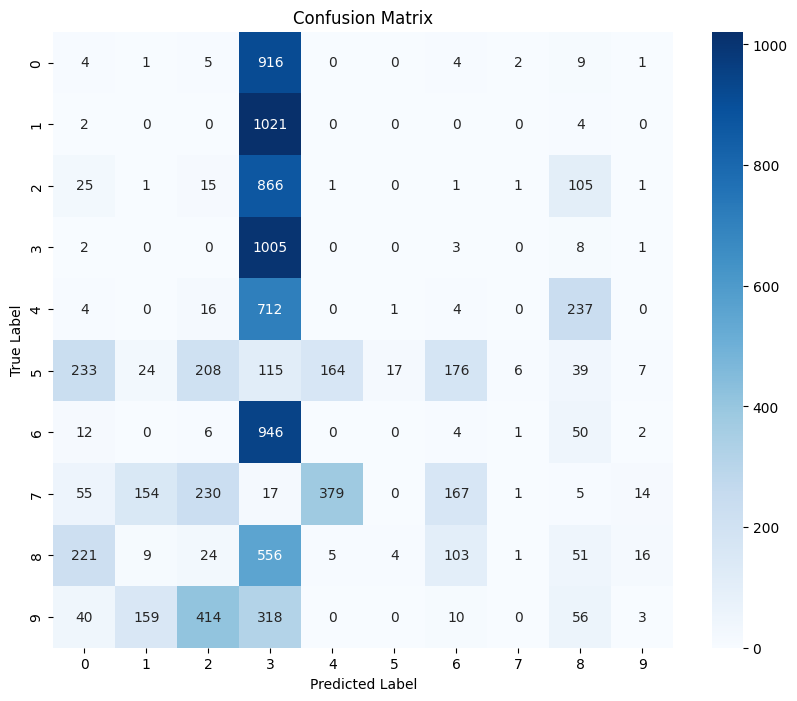

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

# Load Fashion-MNIST dataset
fashion_mnist = fetch_openml(name="Fashion-MNIST", parser ='auto')

# Prepare data
X_fashion = fashion_mnist.data.astype('float32')
y_fashion = fashion_mnist.target.astype('int64')

# Scale the data
scaler = StandardScaler()
X_scaled_fashion = scaler.fit_transform(X_fashion)

# Split the data into train and test sets
# X_train_fashion, X_test_fashion, y_train_fashion, y_test_fashion = train_test_split(X_scaled_fashion, y_fashion, test_size=0., random_state=42)
# Predict on the test set
X_fashion = X_fashion[:10000]
y_fashion = y_fashion[:10000]
y_pred_fashion = mlp.predict(X_fashion)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_fashion, y_pred_fashion)

# Plot confusion matrix using heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [24]:
f1 = f1_score(y_fashion, y_pred_fashion, average='weighted')
print("F1-score:", f1)

F1-score: 0.0399386927507185


<h1><center>t-SNE plot for the Fashion-MNIST Dataset </center>

In [25]:
mlp

MLPClassifier(hidden_layer_sizes=(30, 20, 10), max_iter=10, random_state=42)

(10000, 30)


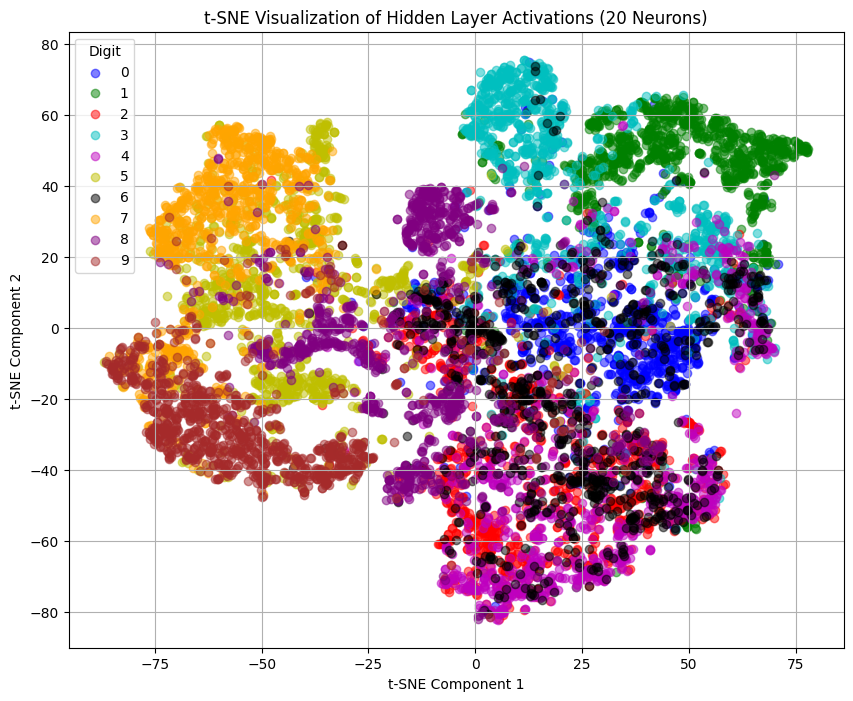

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Assuming you have already trained your MLP model
# Extract activations from the layer containing 20 neurons
activation_layer = mlp.hidden_layer_sizes[-2]  # Index of the layer containing 20 neurons
activation_fn = np.vectorize(lambda x: max(0, x))  # ReLU activation function
hidden_activations = activation_fn(np.dot(X_fashion, mlp.coefs_[0]) + mlp.intercepts_[0])  # First hidden layer activations

print(hidden_activations.shape)

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(hidden_activations)

# Plot t-SNE results
plt.figure(figsize=(10, 8))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown']

for i in range(10):
    plt.scatter(tsne_result[y_fashion == i, 0], tsne_result[y_fashion == i, 1], c=colors[i], label=str(i), alpha=0.5)
plt.title('t-SNE Visualization of Hidden Layer Activations (20 Neurons)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Digit')
plt.grid(True)
plt.show()